In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import linregress
%matplotlib inline

In [2]:
import pandas as pd

def read_data(filename):
    df = pd.read_csv(filename)
    df = pd.DataFrame(df, columns = ['Year','State','County','Uninsured',
                                     'UIZ','Unemployed','Labor','UEZ','Homeowners','Burden'])
    return df

cali = read_data("cali.csv")
south = read_data("sc.csv")
wy = read_data("wy.csv")

In [3]:
def scatter(xp,xu,yp,yu,wp,wu):
    plt.plot(np.array(xp),np.array(xu), 'go') 
    plt.plot(np.array(yp),np.array(yu),'r*')
    plt.plot(np.array(wp),np.array(wu),'b1')
    plt.style.use('classic')
    plt.style.use('seaborn-whitegrid')
    plt.grid(True)  
    plt.show()

# Each data line graph

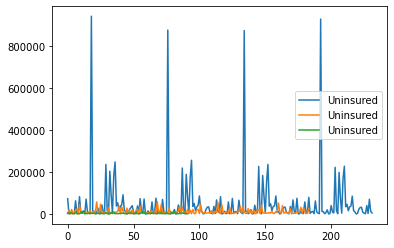

In [4]:
cali.Uninsured.plot()
south.Uninsured.plot()
wy.Uninsured.plot()
plt.legend(loc='best')
plt.show()

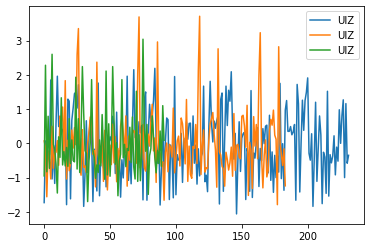

In [5]:
cali.UIZ.plot()
south.UIZ.plot()
wy.UIZ.plot()
plt.legend(loc='best')
plt.show()

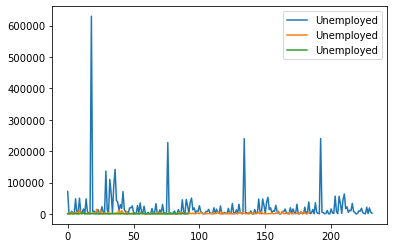

In [6]:
cali.Unemployed.plot()
south.Unemployed.plot()
wy.Unemployed.plot()
plt.legend(loc='best')
plt.show()

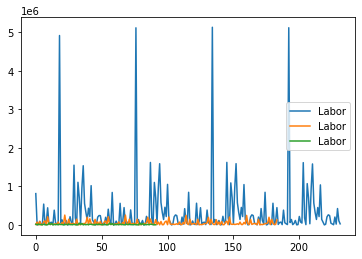

In [7]:
cali.Labor.plot()
south.Labor.plot()
wy.Labor.plot()
plt.legend(loc='best')
plt.show()

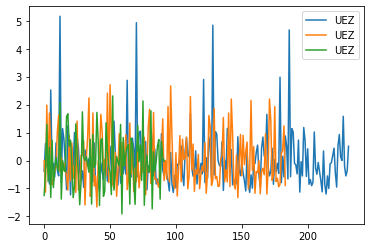

In [8]:
cali.UEZ.plot()
south.UEZ.plot()
wy.UEZ.plot()
plt.legend(loc='best')
plt.show()

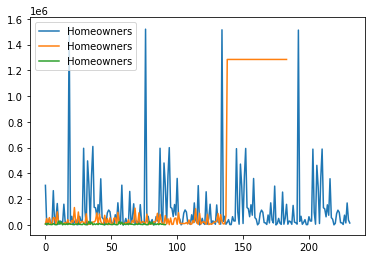

In [9]:
cali.Homeowners.plot()
south.Homeowners.plot()
wy.Homeowners.plot()
plt.legend(loc='best')
plt.show()

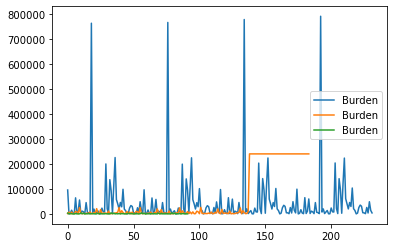

In [10]:
cali.Burden.plot()
south.Burden.plot()
wy.Burden.plot()
plt.legend(loc='best')
plt.show()

# Scatter plots of the data

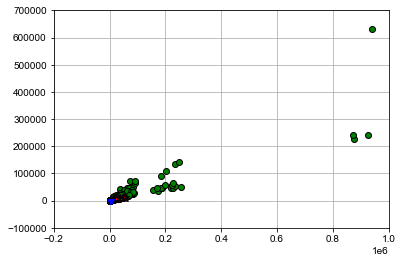

In [11]:
xp = cali.Uninsured
xu = cali.Unemployed
yp = south.Uninsured
yu = south.Unemployed
wp = wy.Uninsured
wu = wy.Unemployed

xh = cali.Homeowners
xb = cali.Burden
yh = south.Homeowners
yb = south.Burden
wh = wy.Homeowners
wb = wy.Burden

xl = cali.Labor
yl = south.Labor
wl = wy.Labor
scatter(xp,xu,yp,yu,wp,wu)

## UnEmployment VS UnInsured

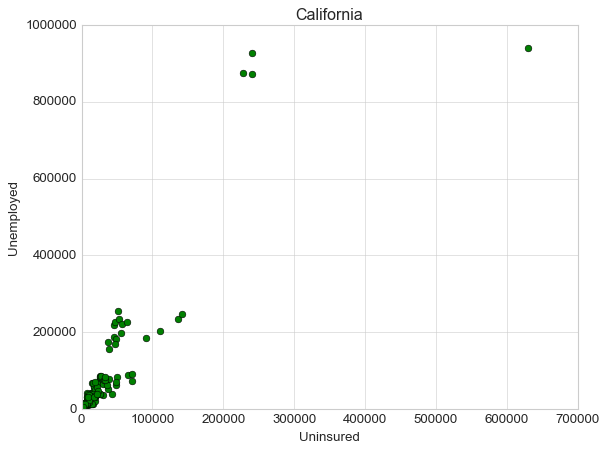

In [12]:
def singScatt(xp,xu,titl): 
    plt.plot(np.array(xp),np.array(xu), 'go')
    plt.style.use('classic')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('Uninsured')
    plt.ylabel('Unemployed')
    plt.title(titl)
    plt.grid(True)  
    plt.show()
singScatt(xu,xp, 'California')

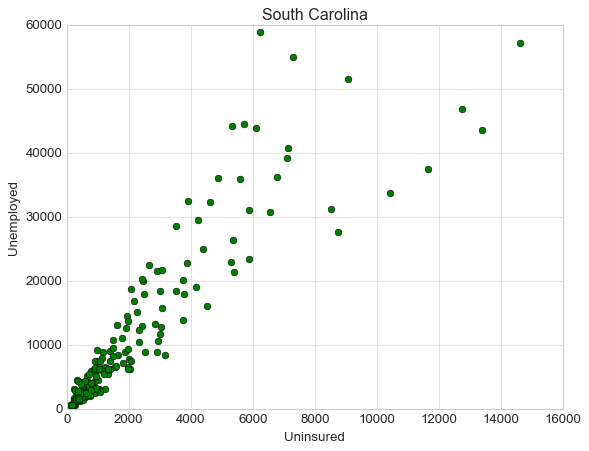

In [13]:
singScatt(yu,yp, "South Carolina")

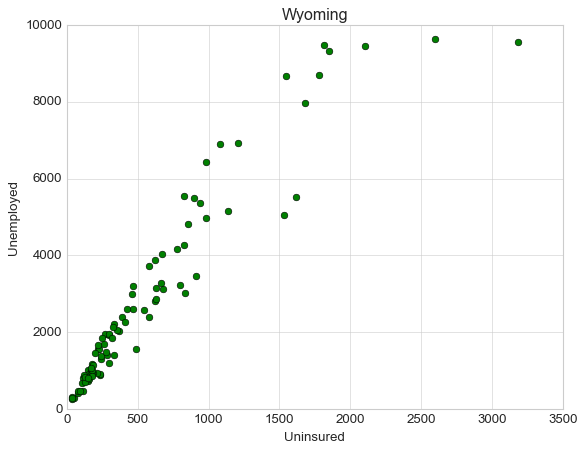

In [14]:
singScatt(wu,wp, "Wyoming")

## Homeowners vs UnInsured

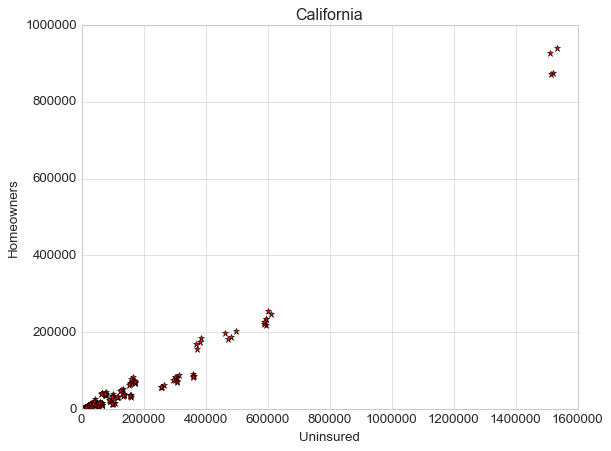

In [15]:
def singScat(xp,xu,titl): 
    plt.plot(np.array(xp),np.array(xu), 'r*')
    plt.style.use('classic')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('Uninsured')
    plt.ylabel('Homeowners')
    plt.title(titl)
    plt.grid(True)  
    plt.show()
    
singScat(xh,xp, 'California')

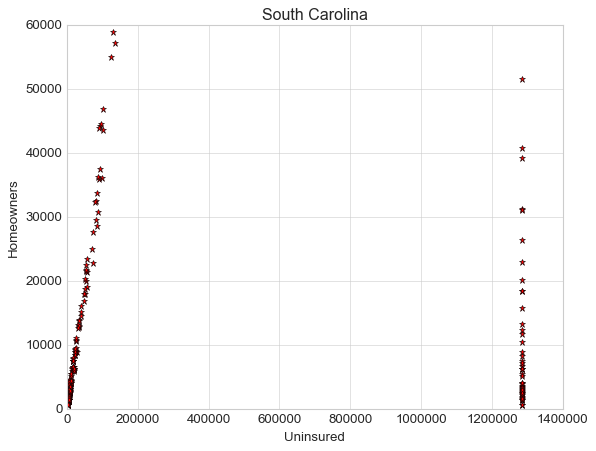

In [16]:
singScat(yh,yp, 'South Carolina')

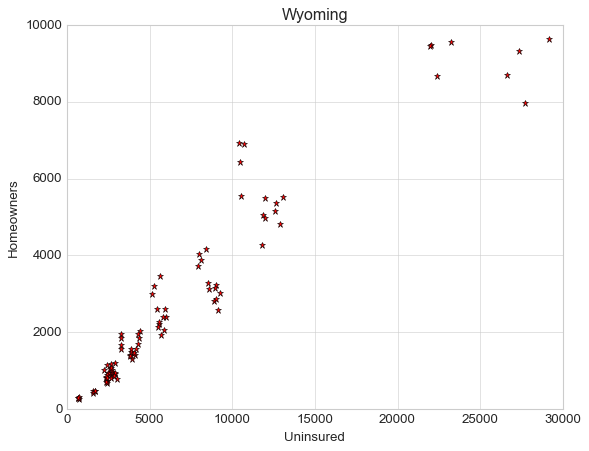

In [17]:
singScat(wh,wp, 'Wyoming')

## Labor VS Burden

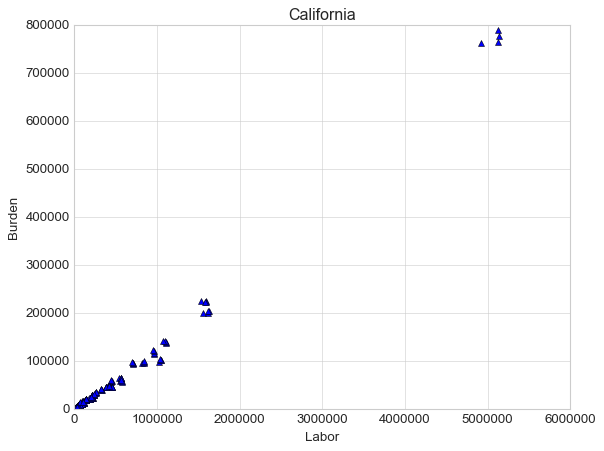

In [18]:
def sing(xp,xu,titl): 
    plt.plot(np.array(xp),np.array(xu), 'b^')
    plt.style.use('classic')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('Labor')
    plt.ylabel('Burden')
    plt.title(titl)
    plt.grid(True)  
    plt.show()

sing(xl,xb, 'California')

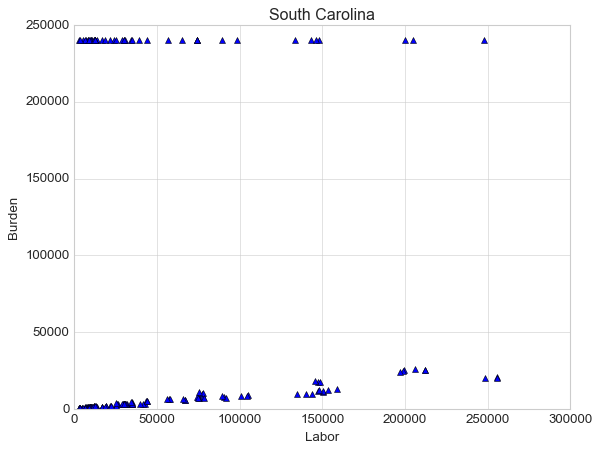

In [19]:
sing(yl,yb, 'South Carolina')

South Carolina does not look so good from the homeowner data. I don't think we should use it. The main point was to use California VS Wyoming

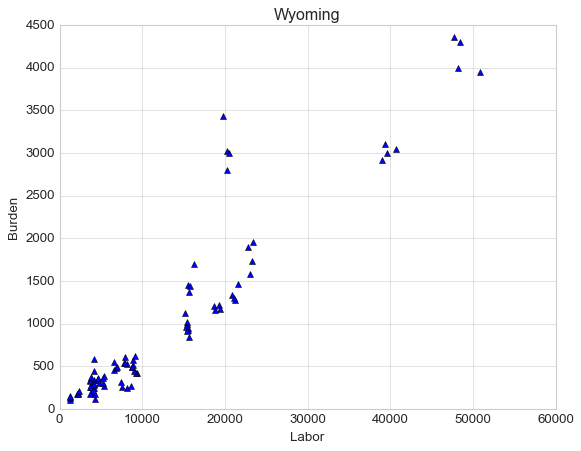

In [20]:
sing(wl,wb, 'Wyoming')

## Labor VS UnInsured

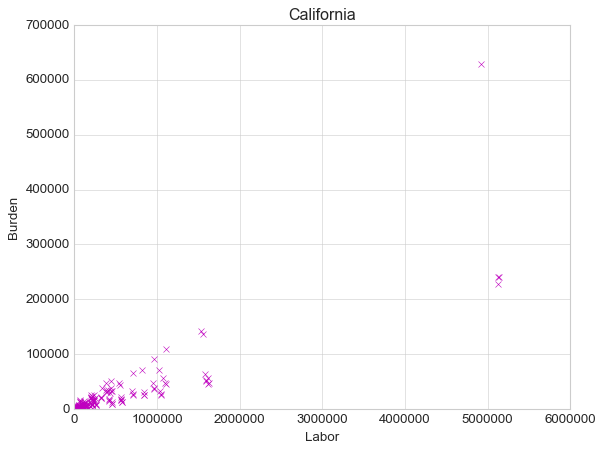

In [21]:
def scat(xp,xu,titl): 
    plt.plot(np.array(xp),np.array(xu), 'mx')
    plt.style.use('classic')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('Labor')
    plt.ylabel('Burden')
    plt.title(titl)
    plt.grid(True)  
    plt.show()

scat(xl,xu, 'California')

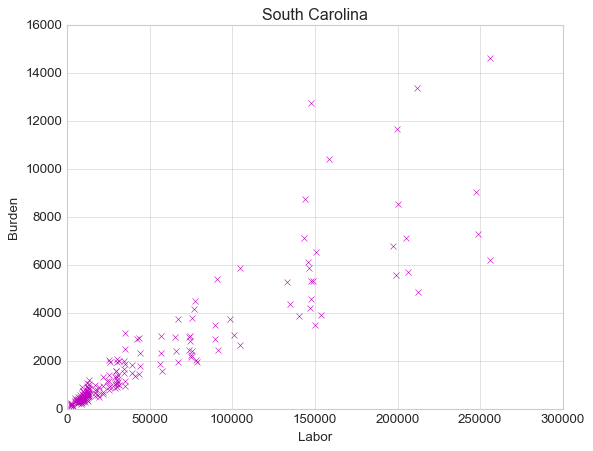

In [22]:
scat(yl,yu, 'South Carolina')

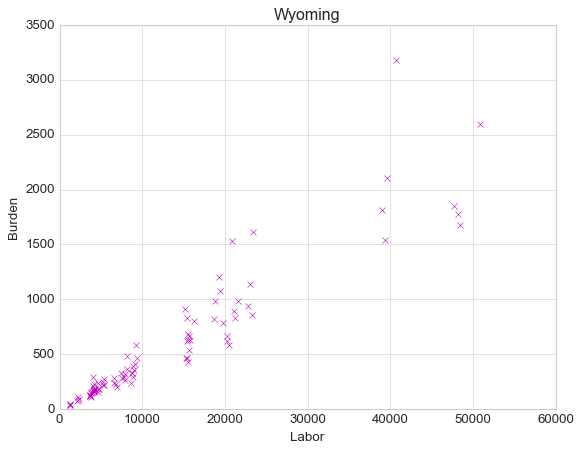

In [23]:
scat(wl,wu, 'Wyoming')

# Scatter with Linear Regression

In [24]:
def line(x,y, titl):
    plt.plot(x,y,'bo')
    a,b = np.polyfit(x, y, 1)
    estY = a*np.array(x) + b
    plt.plot(x, estY,
           label = 'Linear Model', linewidth=3.0, color='r')
    plt.legend(loc="best")
    plt.title(titl)
    plt.xlabel('Uninsured')
    plt.ylabel('Unemployed')
    plt.show()

## UnEmployed VS UnInsured

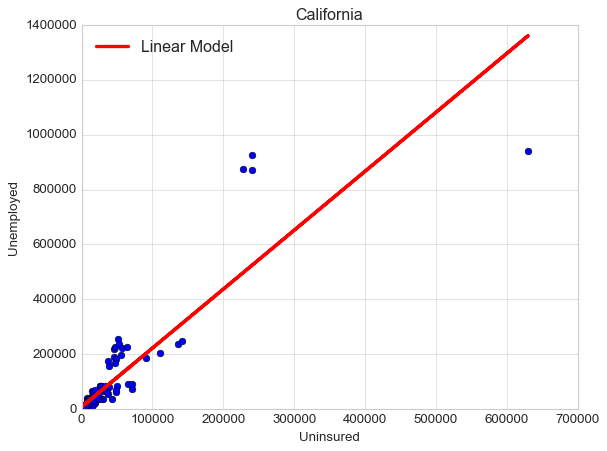

In [25]:
line(xu,xp, "California")

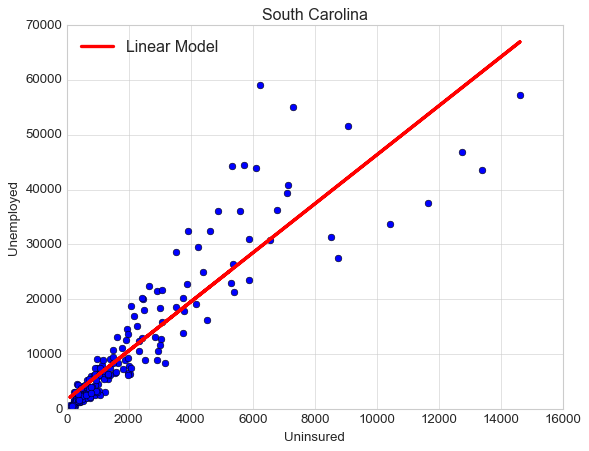

In [26]:
line(yu,yp, "South Carolina")

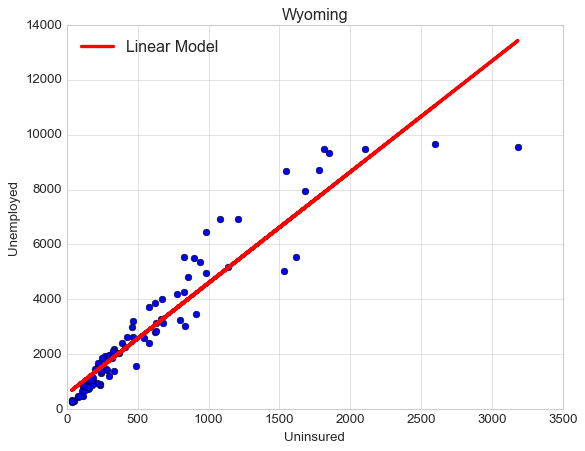

In [27]:
line(wu,wp, "Wyoming")

In [28]:
calnin = read_data("cal19.txt")
snin = read_data("sc19.txt")
wynin = read_data("wy19.txt")

calo = read_data("cal20.txt")
so = read_data("sc20.txt")
wyo = read_data("wy20.txt")

calone = read_data("cal21.txt")
sone = read_data("sc21.txt")
wyone = read_data("wy21.txt")

caltwo = read_data("cal22.txt")
stwo = read_data("sc22.txt")
wytwo = read_data("wy22.txt")

# Cross Validation via Year

In [29]:
def rSq(data, predic):
    error = ((predic - data)**2).sum()
    meanData = data.sum()/len(data)
    vari = ((data-meanData)**2).sum()
    return 1 - (error/vari)

def cross(x,y, xx,yy, xxx,yyy,xxxx,yyyy, titl):
    plt.plot(x,y,'bo')
    a,b = np.polyfit(x, y, 1)
    estY = a*np.array(x) + b
    rline = rSq(y, estY)
    plt.plot(x, estY,
           label = '2022 '+ 'R2 = ' + str(rline), linewidth=3.0, color='r')
    
    plt.plot(xx,yy,'r*')
    aa,bb = np.polyfit(xx, yy, 1)
    esttY = aa*np.array(xx) + bb
    rrline = rSq(yy, esttY)
    plt.plot(xx, esttY,
           label = '2021 '+ 'R2 = ' + str(rrline), linewidth=3.0, color='y')
    
    plt.plot(xxx,yyy,'gx')
    aaa,bbb = np.polyfit(xxx, yyy, 1)
    estttY = aaa*np.array(xxx) + bbb
    rrrline = rSq(yyy, estttY)
    plt.plot(xxx, estttY,
           label = '2020 '+ 'R2 = ' + str(rrrline), linewidth=3.0, color='c')
    
    plt.plot(xxxx,yyyy,'k1')
    aaaa,bbbb = np.polyfit(xxxx, yyyy, 1)
    esttttY = aaaa*np.array(xxxx) + bbbb
    rrrrline = rSq(yyyy, esttttY)
    plt.plot(xxxx, esttttY,
           label = '2020 '+ 'R2 = ' + str(rrrrline), linewidth=3.0, color='m')
    plt.legend(loc="best")
    plt.title(titl)
    plt.xlabel('Uninsured')
    plt.ylabel('Unemployed')
    plt.show()

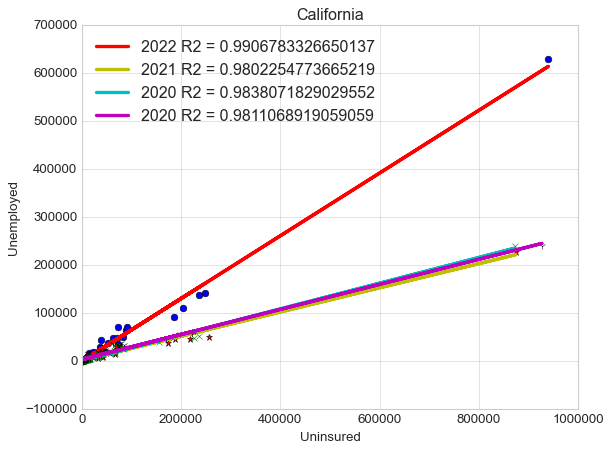

In [30]:
cross(caltwo.Uninsured,caltwo.Unemployed, calone.Uninsured,calone.Unemployed,
      calo.Uninsured,calo.Unemployed,calnin.Uninsured,calnin.Unemployed, "California")

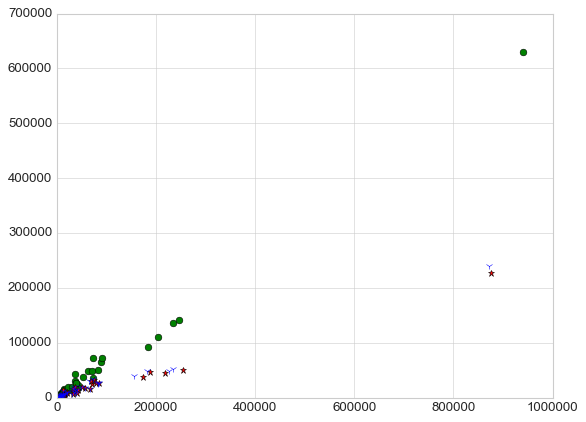

In [31]:
scatter(caltwo.Uninsured,caltwo.Unemployed, calone.Uninsured,calone.Unemployed,
      calo.Uninsured,calo.Unemployed)

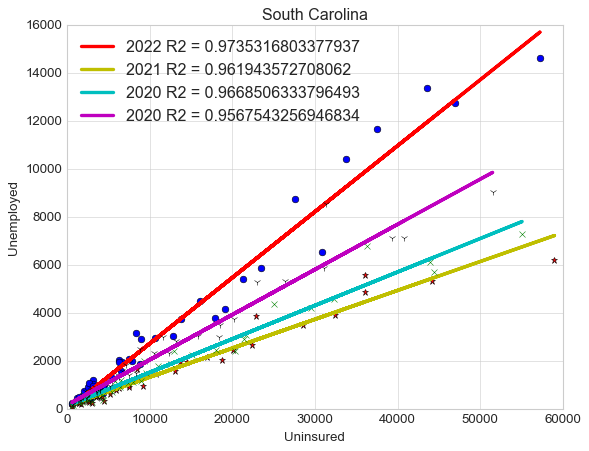

In [32]:
cross(stwo.Uninsured,stwo.Unemployed, sone.Uninsured,sone.Unemployed,
      so.Uninsured,so.Unemployed,snin.Uninsured,snin.Unemployed, "South Carolina")

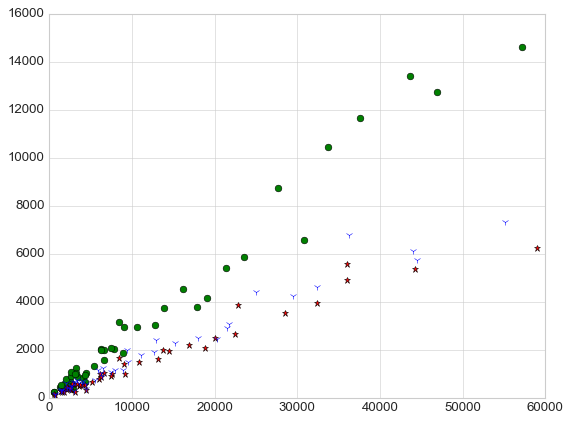

In [33]:
scatter(stwo.Uninsured,stwo.Unemployed, sone.Uninsured,sone.Unemployed,
      so.Uninsured,so.Unemployed)

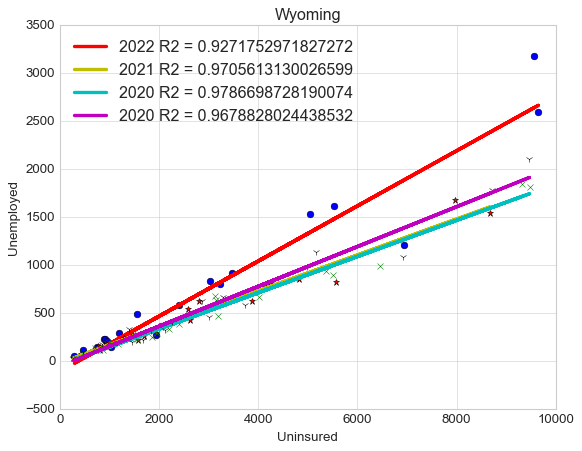

In [34]:
cross(wytwo.Uninsured,wytwo.Unemployed, wyone.Uninsured,wyone.Unemployed,
      wyo.Uninsured,wyo.Unemployed,wynin.Uninsured,wynin.Unemployed, "Wyoming")

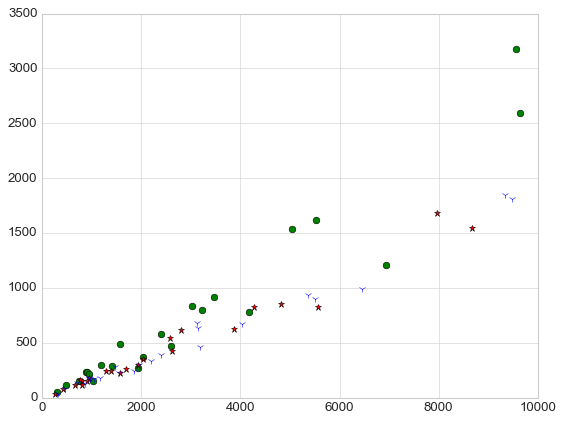

In [35]:
scatter(wytwo.Uninsured,wytwo.Unemployed, wyone.Uninsured,wyone.Unemployed,
      wyo.Uninsured,wyo.Unemployed)

# Histogram of Z scores for UnInsured

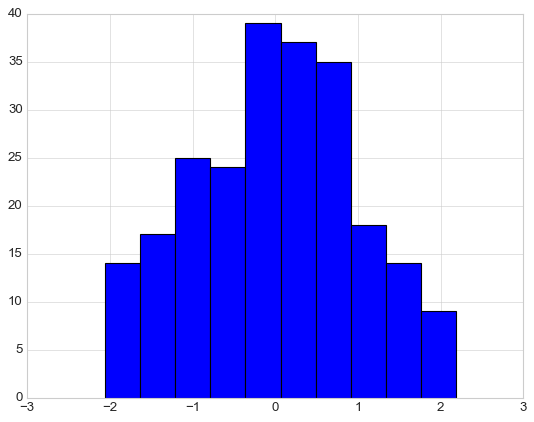

In [36]:
v = plt.hist(cali.UIZ)
plt.show()               


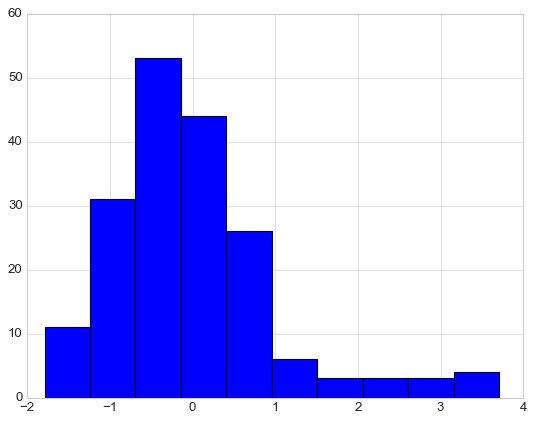

In [37]:
v = plt.hist(south.UIZ)
plt.show()               


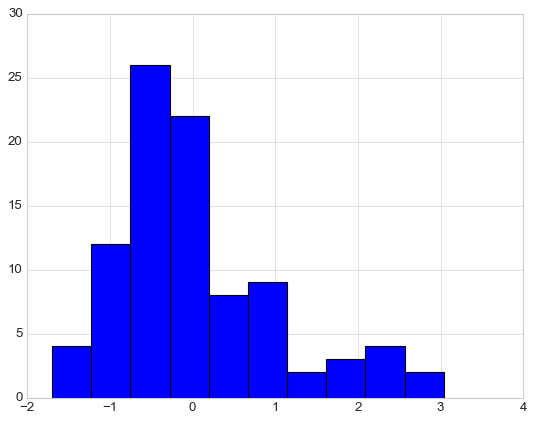

In [38]:
v = plt.hist(wy.UIZ)
plt.show()               


# Histogram of Z scores for UnEmployed

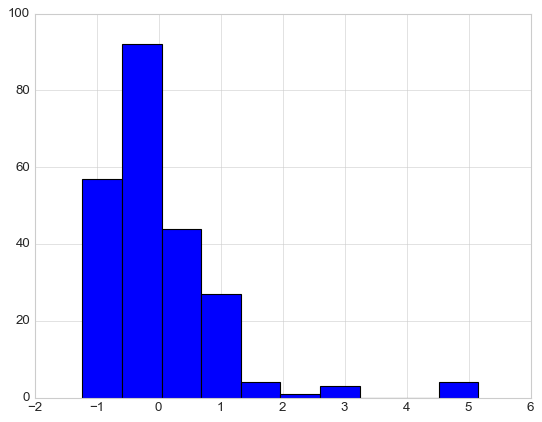

In [39]:
v = plt.hist(cali.UEZ)
plt.show()               


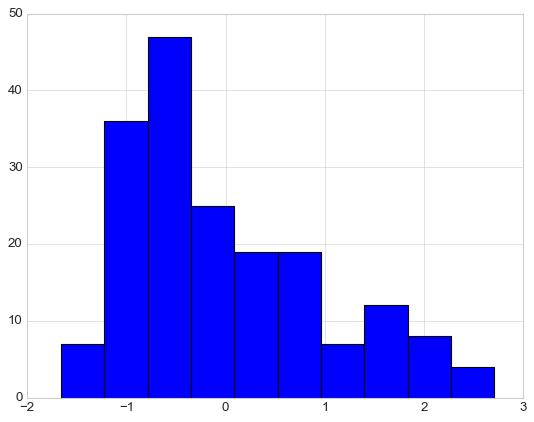

In [40]:
v = plt.hist(south.UEZ)
plt.show()               


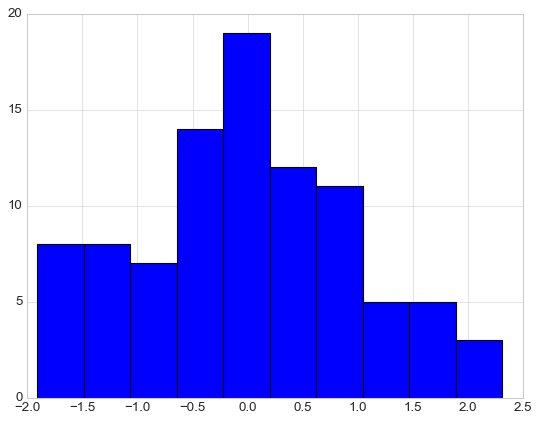

In [41]:
v = plt.hist(wy.UEZ)
plt.show()               
